# The Multi-Armed Bandit Problem: A Look into Dynamic Programming

## The following Jupyter Notebook is an analysis on the multi-armed bandit optimaztion problem. That can be described as if you were able to select from a row of slot machines which one should you choose to maximize your rewards. 

# Experiment 1: Selecting the Best Lever

## This experiment involves a fixed reward based on the lever the program has selected. The program takes a random normal distribution and adds the level (1, 2, or 3) value to the random value. 

## The goal of this experimnent is to discover how long the program takes to learn to select the third lever to optimize the reward.

In [365]:
import numpy as np
import matplotlib.pyplot as plt
import random

#Sets seed for replicatable events.
np.random.seed(42)
random.seed(42)

In [12]:
class Bandit:
  def __init__(self, m):
    self.m = m
    self.mean = 0
    self.N = 0

  def pull(self):
    return np.random.randn() + self.m

  def update(self, x):
    self.N += 1
    self.mean = (1 - 1.0/self.N)*self.mean + 1.0/self.N*x

In [13]:
def run_experiment(m1, m2, m3, eps, N):
  bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]

  data = np.empty(N)

  for i in range(N):
    # epsilon greedy
    p = np.random.random()
    if p < eps:
      j = np.random.choice(3)
    else:
      j = np.argmax([b.mean for b in bandits])
    x = bandits[j].pull()
    bandits[j].update(x)

    # for the plot
    data[i] = x
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

  # plot moving average ctr
  plt.plot(cumulative_average)
  plt.plot(np.ones(N)*m1)
  plt.plot(np.ones(N)*m2)
  plt.plot(np.ones(N)*m3)
  plt.xscale('log')
  plt.show()

  for b in bandits:
    print(b.mean)

  return cumulative_average

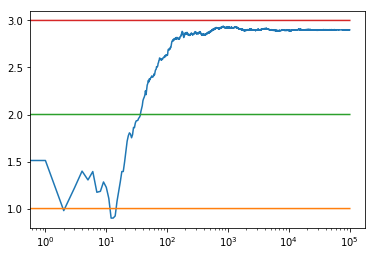

0.9717473777852238
2.0121169870986733
2.9987649244680217


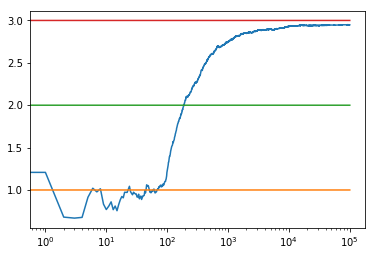

0.9957743536637237
1.9819462310697158
3.0010354309786518


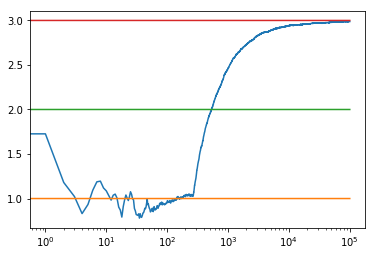

1.0178056753780371
1.9875543628269203
3.0023163105567323


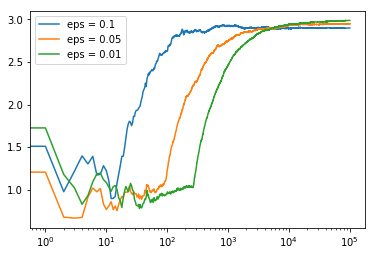

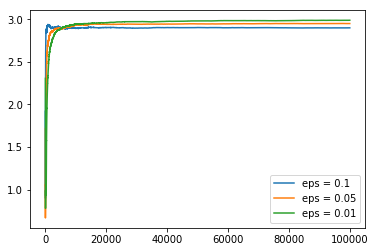

In [17]:
if __name__ == '__main__':
  c_1 = run_experiment(1.0, 2.0, 3.0, 0.1, 100000)
  c_05 = run_experiment(1.0, 2.0, 3.0, 0.05, 100000)
  c_01 = run_experiment(1.0, 2.0, 3.0, 0.01, 100000)

  # log scale plot
  plt.plot(c_1, label='eps = 0.1')
  plt.plot(c_05, label='eps = 0.05')
  plt.plot(c_01, label='eps = 0.01')
  plt.legend()
  plt.xscale('log')
  plt.show()


  # linear plot
  plt.plot(c_1, label='eps = 0.1')
  plt.plot(c_05, label='eps = 0.05')
  plt.plot(c_01, label='eps = 0.01')
  plt.legend()
  plt.show()

# Experiment 1: Results

## There was an intriguing result in the behavior of the tendency to select a lever. All three epsion values resulted in a mean average around 3. Which was expected since the 3 was producing the highest reward. The 0.1 and 0.05 epsion values were able to select the appropriate lever quicker than the 0.01 value. 

# Experiment 2: Press this Lever for a Reward

## This experiment is similar to the first however the normal distribution is taken away to see if there is a resulting difference in dynamic programing tendency in lever choice. 

In [345]:
class Bandit:
  def __init__(self, m):
    self.m = m
    self.mean = 0
    self.N = 0

  def pull_2(self):
    #If the 
    if self.m == 1:
        return 0
    elif self.m == 2:
        return 0
    elif self.m == 3:
        return 3
    #return np.random.randn() + self.m

  def update(self, x):
    self.N += 1
    self.mean = (1 - 1.0/self.N)*self.mean + 1.0/self.N*x

In [346]:
def run_experiment_2(m1, m2, m3, eps, N):
  bandits_2 = [Bandit(m1), Bandit(m2), Bandit(m3)]

  data = np.empty(N)

  for i in range(N):
    # epsilon greedy
    p = np.random.random()
    if p < eps:
      #Select a random level to pull
      j = np.random.choice(3)
    else:
      #Select the lever that has been resulting in the highest mean reward. 
      j = np.argmax([b.mean for b in bandits_2])
    x = bandits_2[j].pull_2()
    bandits_2[j].update(x)

    # for the plot
    data[i] = x
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

  # plot moving average ctr
  plt.plot(cumulative_average)
  plt.plot(np.ones(N)*m1)
  plt.plot(np.ones(N)*m2)
  plt.plot(np.ones(N)*m3)
  plt.xscale('log')
  plt.show()

  for b in bandits_2:
    print(b.mean)

  return cumulative_average

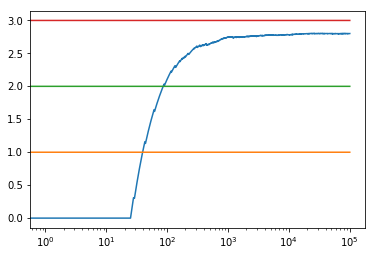

0.0
0.0
2.9999999999999996


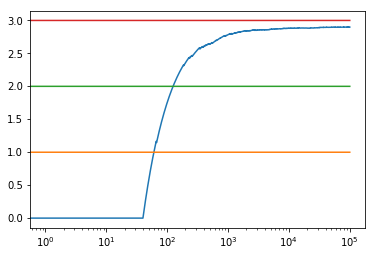

0.0
0.0
3.0


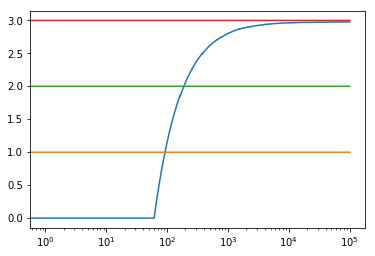

0.0
0.0
2.9999999999999996


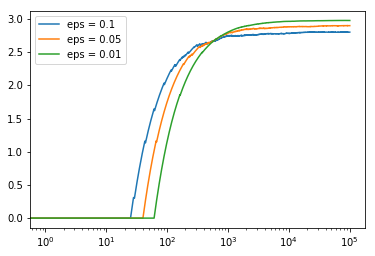

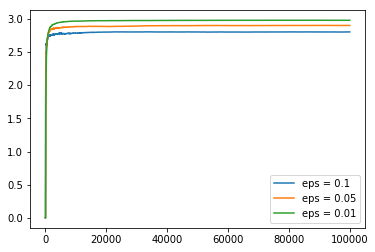

In [347]:
if __name__ == '__main__':
  c_1 = run_experiment_2(1.0, 2.0, 3.0, 0.1, 100000)
  c_05 = run_experiment_2(1.0, 2.0, 3.0, 0.05, 100000)
  c_01 = run_experiment_2(1.0, 2.0, 3.0, 0.01, 100000)

  # log scale plot
  plt.plot(c_1, label='eps = 0.1')
  plt.plot(c_05, label='eps = 0.05')
  plt.plot(c_01, label='eps = 0.01')
  plt.legend()
  plt.xscale('log')
  plt.show()


  # linear plot
  plt.plot(c_1, label='eps = 0.1')
  plt.plot(c_05, label='eps = 0.05')
  plt.plot(c_01, label='eps = 0.01')
  plt.legend()
  plt.show()

# Experiment 2: Results

## This experiment shows the utility of dynamic programming. It mirrors three levers that could be pulled that to give a reward. 

## The epsion values describe the likehood of experimenting. The greater the epsion value the greater likehood of exploration. This explains the larger epsion (0.1) early tendency to reach the 3.0 limit. Followed by the 0.05 epsion and finally the 0.01 epsion.

## At the final trials of lever pulling, this order is revered because the smaller epsion continues to select the third lever while the other epsion values have the possiblility of choosing a random lever. 

# Experiment 3: The Gambler Dilemma

## This experiment is designed to see if we can control whether a program will gamble for a higher reward or choose a safe option. 

## Scenario: One slot machine rewards a 1 guaranteed while the other slot offers a reward of 100 one percent of the time. 

In [497]:
class Bandit:
  def __init__(self, m):
    self.m = m
    self.mean = 0
    self.N = 0

  def pull_3(self):
    if self.m == 1:
        num = random.randint(0,100)
        if num == 1:
            return 100
        else:
            return 0
    elif self.m == 2:
        return 1

  def update(self, x):
    self.N += 1
    self.mean = (1 - 1.0/self.N)*self.mean + 1.0/self.N*x

In [498]:
def run_experiment_3(m1, m2, eps, N):
  bandits_3 = [Bandit(m1), Bandit(m2)]

  data = np.empty(N)

  for i in range(N):
    # epsilon greedy
    p = np.random.random()
    if p < eps:
      #Select a random level to pull
      j = np.random.choice(2)
    else:
      #Select the lever that has been resulting in the highest mean reward. 
      j = np.argmax([b.mean for b in bandits_3])
    x = bandits_3[j].pull_3()
    bandits_3[j].update(x)

    # for the plot
    data[i] = x
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

  # plot moving average ctr
  plt.plot(cumulative_average)
  plt.plot(np.ones(N)*m1)
  plt.plot(np.ones(N)*m2)
  plt.xscale('log')
  plt.show()

  for b in bandits_3:
    print(b.mean)

  return cumulative_average

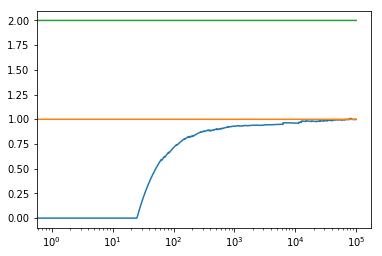

0.9783728115345004
1.0


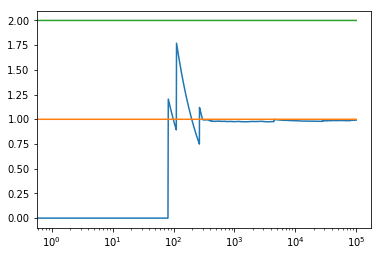

0.7562117392869993
1.0


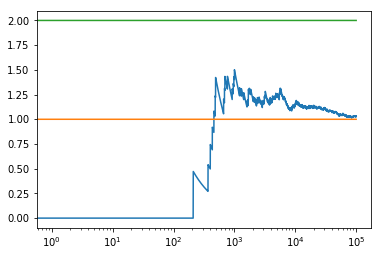

1.031528995415432
1.0


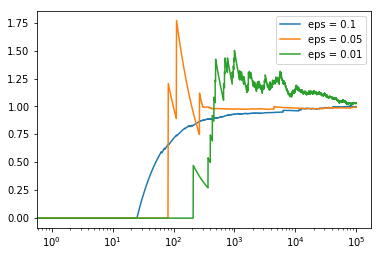

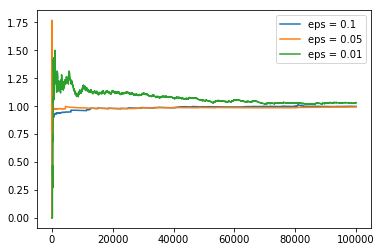

In [507]:
if __name__ == '__main__':
  c_1 = run_experiment_3(1.0, 2.0, 0.1, 100000)
  c_05 = run_experiment_3(1.0, 2.0, 0.05, 100000)
  c_01 = run_experiment_3(1.0, 2.0, 0.01, 100000)

  # log scale plot
  plt.plot(c_1, label='eps = 0.1')
  plt.plot(c_05, label='eps = 0.05')
  plt.plot(c_01, label='eps = 0.01')
  plt.legend()
  plt.xscale('log')
  plt.show()


  # linear plot
  plt.plot(c_1, label='eps = 0.1')
  plt.plot(c_05, label='eps = 0.05')
  plt.plot(c_01, label='eps = 0.01')
  plt.legend()
  plt.show()

## Experiment 3: Results

## The listed means under the graph are important to take note of. The first number represents the gamble lever mean while the second number is the second (guaranteed) to produce 1. That is why every second number has a mean on 1. 

## The program eventually returns to 1 because of the argmax function. If it was risky and countinued to build up a mean of zero it would select the guranteed option. If it was risky and won it would countinue to risk it until that mean went below 1. 